# 数据统计

In [1]:
import pandas as pd
import json
def read_jsonl(file_path):
    a=[]
    with open(file_path, 'r') as file:
        
        for line in file:
            json_obj = json.loads(line)
            a.append(json_obj)
    return a



In [2]:
pwd='/home/ubuntu/hallu_team/junkai/Dataset/RLC-bench/answer/Object'

pope_path='/home/ubuntu/hallu_team/junkai/Dataset/RLC-bench/answer/Object/llava-v1.5/llava-v1.5-7b/answers_object_random.jsonl'
data=read_jsonl(pope_path)
df=pd.DataFrame(data)

In [3]:
df.columns

Index(['image_id', 'query_prompt', 'response', 'label', 'mllm_name', 'type',
       'yes_prob', 'no_prob'],
      dtype='object')

In [4]:
df.loc[0]

image_id                                COCO_val2014_000000310196
query_prompt                   Is there a snowboard in the image?
response        Yes, there is a snowboard in the image, and th...
label                                                         yes
mllm_name                                           llava-v1.5-7b
type                                                 object-YesNo
yes_prob                                                 0.538983
no_prob                                                  0.461017
Name: 0, dtype: object

In [8]:
def filter_and_replace(value):
    value=value.lower()
    if 'yes' in value:
        return 'yes'
    elif 'no' in value:
        return 'no'
    else:
        return value
response_values = df['label'].unique()

In [9]:
response_values

array(['yes', 'no'], dtype=object)

In [10]:
df['response'] = df['response'].apply(filter_and_replace)

[[1362  138]
 [ 174 1326]]


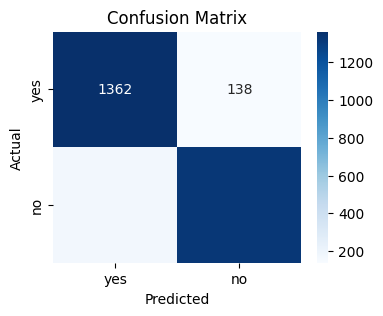

In [17]:

import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(df['label'], df['response'], labels=['yes', 'no'])
print(cm)
# 可视化混淆矩阵
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['yes', 'no'], yticklabels=['yes', 'no'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

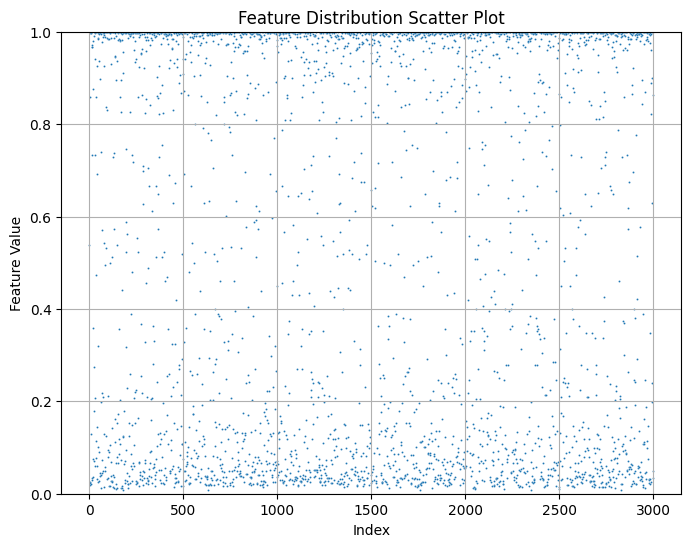

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df.index, y='yes_prob', data=df,s=2)
plt.title('Feature Distribution Scatter Plot')
plt.xlabel('Index')
plt.ylabel('Feature Value')
plt.ylim(0, 1)  # 设置y轴范围
plt.grid(True)
plt.show()